In [1]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np
import os

In [2]:
strategies_list = ['RandomSampling', 'UncSampling']

dirname = '../../../../referee/'

In [3]:
flist = {}

for name in strategies_list:
    flist[name] = os.listdir(dirname + '/' + name + '/metrics/')

In [4]:
n_versions = 100

metrics = {}

for name in strategies_list:
    
    metrics[name] = {}
    
    for i in range(n_versions):
        metrics[name][i] = pd.read_csv(dirname + '/' + name + '/metrics/metrics_' + \
                                           name + '_v' + str(i) + '.dat', index_col=False,
                                           sep=' ')

In [5]:
acc = {}
eff = {}
pur = {}
fom = {}

acc_mean = {}
eff_mean = {}
pur_mean = {}
fom_mean = {}

acc_std = {}
eff_std = {}
pur_std = {}
fom_std = {}

n_loops = 300

for name in strategies_list:
    vs = range(n_versions)
    acc[name] = np.array([metrics[name][i]['accuracy'].values for i in vs])
    pur[name] = np.array([metrics[name][i]['purity'].values for i in vs])
    eff[name] = np.array([metrics[name][i]['efficiency'].values for i in vs])
    fom[name] = np.array([metrics[name][i]['fom'].values for i in vs])

    acc_mean[name] = np.array([np.mean(acc[name][:,i]) for i in range(n_loops)])
    acc_std[name] = np.array([np.std(acc[name][:,i]) for i in range(n_loops)])

    pur_mean[name] = np.array([np.mean(pur[name][:,i]) for i in range(n_loops)])
    pur_std[name] = np.array([np.std(pur[name][:,i]) for i in range(n_loops)])

    eff_mean[name] = np.array([np.mean(eff[name][:,i]) for i in range(n_loops)])
    eff_std[name] = np.array([np.std(eff[name][:,i]) for i in range(n_loops)])

    fom_mean[name] = np.array([np.mean(fom[name][:,i]) for i in range(n_loops)])
    fom_std[name] = np.array([np.std(fom[name][:,i]) for i in range(n_loops)])

In [6]:
all_fom_unc = [metrics['UncSampling'][i].iloc[-1]['fom'] for i in vs]

In [7]:
indx = all_fom_unc.index(max(all_fom_unc))

In [8]:
indx

68

In [9]:
metrics['UncSampling'][indx].iloc[-1]['accuracy']

0.9679962498934628

In [10]:
metrics['UncSampling'][indx].iloc[-1]['fom']

0.4201339712918661

In [11]:
metrics['UncSampling'][indx].iloc[-1]['purity']

0.9158878504672896

In [12]:
metrics['UncSampling'][indx].iloc[-1]['efficiency']

0.5358851674641149

In [13]:
for name in strategies_list:
    print('acc ', name, ': ', acc_mean[name][-1], ' +/- ', acc_std[name][-1])
    print('eff ', name, ': ', eff_mean[name][-1], ' +/- ', eff_std[name][-1])
    print('pur ', name, ': ', pur_mean[name][-1], ' +/- ', pur_std[name][-1])
    print('fom ', name, ': ', fom_mean[name][-1], ' +/- ', fom_std[name][-1])
    print('\n')

acc  RandomSampling :  0.946368362737578  +/-  0.004538977272580677
eff  RandomSampling :  0.24117330593068625  +/-  0.0731546085595749
pur  RandomSampling :  0.8681632146291846  +/-  0.07991037207138442
fom  RandomSampling :  0.1684742983787431  +/-  0.05619077992164621


acc  UncSampling :  0.9673254922014831  +/-  0.00046148632917214857
eff  UncSampling :  0.5442342795177  +/-  0.010790592150053575
pur  UncSampling :  0.8880239337045229  +/-  0.016928624401331364
fom  UncSampling :  0.3950839529939288  +/-  0.013096235061128348




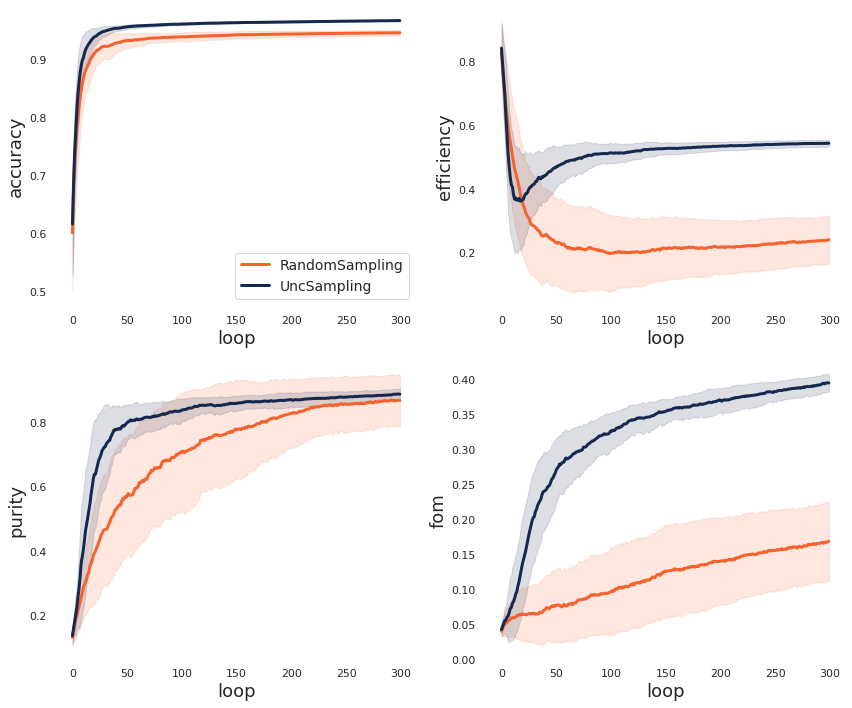

In [14]:
c = ['#F5622E', '#15284F']

sns.set(rc={'axes.facecolor': 'white', 'figure.facecolor': 'white'})

i = 0
lw = 3

plt.figure(figsize=(12,10))

plt.subplot(2,2,1)
for name in strategies_list:
    plt.plot(metrics[name][i]['loop'], acc_mean[name], label=name, color=c[strategies_list.index(name)], lw=lw)
    plt.fill_between(metrics[name][i]['loop'], acc_mean[name] - acc_std[name], acc_mean[name] + acc_std[name], 
                     color=c[strategies_list.index(name)], alpha=0.15)
    #plt.plot(metrics[name][i]['loop'], metrics['UncSampling'][indx]['accuracy'], label='Fink', color='black', 
    #         ls='--', lw=0.5*lw)
plt.ylabel('accuracy', fontsize=18)
plt.xlabel('loop', fontsize=18)
plt.legend(loc='lower right', fontsize=14)

plt.subplot(2,2,2)
for name in strategies_list:
    plt.plot(metrics[name][i]['loop'], eff_mean[name], label=name, color=c[strategies_list.index(name)], lw=lw)
    plt.fill_between(metrics[name][i]['loop'], eff_mean[name] - eff_std[name], eff_mean[name] + eff_std[name], 
                     color=c[strategies_list.index(name)], alpha=0.15)
    #plt.plot(metrics[name][i]['loop'], metrics['UncSampling'][indx]['efficiency'], label='Fink', color='black', 
    #         ls='--', lw=0.5*lw)
plt.ylabel('efficiency', fontsize=18)
plt.xlabel('loop', fontsize=18)
#plt.legend(fontsize=14)

plt.subplot(2,2,3)
for name in strategies_list:
    plt.plot(metrics[name][i]['loop'], pur_mean[name], label=name, color=c[strategies_list.index(name)], lw=lw)
    plt.fill_between(metrics[name][i]['loop'], pur_mean[name] - pur_std[name], pur_mean[name] + pur_std[name], 
                     color=c[strategies_list.index(name)], alpha=0.15)
    #plt.plot(metrics[name][i]['loop'], metrics['UncSampling'][indx]['purity'], label='Fink', color='black', 
    #         ls='--', lw=0.5*lw)
plt.ylabel('purity', fontsize=18)
plt.xlabel('loop', fontsize=18)
#plt.legend(fontsize=14)

plt.subplot(2,2,4)
for name in strategies_list:
    plt.plot(metrics[name][i]['loop'], fom_mean[name], label=name, color=c[strategies_list.index(name)], lw=lw)
    plt.fill_between(metrics[name][i]['loop'], fom_mean[name] - fom_std[name], fom_mean[name] + fom_std[name], 
                     color=c[strategies_list.index(name)], alpha=0.15)
    #plt.plot(metrics[name][i]['loop'], metrics['UncSampling'][indx]['fom'], label='Fink', color='black', 
    #         ls='--', lw=0.5*lw)
plt.ylabel('fom', fontsize=18)
plt.xlabel('loop', fontsize=18)
#plt.legend(loc='upper left',fontsize=14)

plt.tight_layout()
#plt.show()
plt.savefig(dirname + '/plots/metrics.pdf')